# **Machine Learning: Clasificacion con SKLearn**

En este notebook estaremos desarrollando varios ejercicios para entender como funciona algunos Algoritmos de Clasificacion

### *Introduccion a la Clasificacion*

In [ ]:
#FEATURES --> 1 = SI y 0 = NO, Tiene pelo largo?, Tiene las uñas afiladas,
#Hace miau?
perro1= [0,1,1] #No tiene pelo largo, Tiene las uñas afil, Hace miau
perro2= [1,0,1 ] #Tiene pelo largo, No tiene las uñas afil, Hace miau
perro3= [1,1,1 ] #Tiene pelo largo, Tiene las uñas afil, Hace miau

gato1= [0,1,0] #No tiene pelo largo, Tiene las uñas afil, No hace miau
gato2= [0,1,1] #No tiene pelo largo, Tiene las uñas afil, Hace miau
gato3= [1,1,0] # Tiene pelo largo, Tiene las uñas afil, No hace miau

#datos = [perro1, perro2, perro3, gato1, gato2, gato3] #Datos--ESTANDARIZAMOS NOMBRES
x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
#clases = [1,1,1,0,0,0] #Clases--> clase1=perro, clase0=gato---ESTANDARIZAMOS NOMBRES
y_train = [1,1,1,0,0,0]

In [ ]:
#Una vez ejecutado lo de arriba, vamos a utilizar SKLEARN SVM LINEAR, eso es un
#ESTIMADOR lineal , que nos ayuda a realizar una estimacion lineal entre las
#Variables, modelo de aprendizaje de maquina
from sklearn.svm import LinearSVC
#INSTANCIAMOS el MODELO, diciendole que modelo queremos usar
model = LinearSVC()
#Introducimos los DATOS y CLASES al modelo
#model.fit(datos, clases)#Ejecutamos y realiza instancia del modelo--ESTANDARIZAMOS
model.fit(x_train, y_train)

LinearSVC()

In [ ]:
#Luego colocamos un Animal x -->
animal_misterioso= [1,1,1]#Tiene pelo largo, Uñas largas y Hace miau
#Hacemos un modelo de PREDICCION y colocamos nuestro PARAMETRO en forma de ARRAY[]
model.predict([animal_misterioso])#Ejecutamos y nos dice que es un PERRO!

array([1])

In [ ]:
#Creamos mas animales -->
misterio1= [1,1,1]
misterio2= [1,1,0]
misterio3= [0,1,1]
#Luego creamos LISTA que se va a llamar PRUEBAS
#pruebas= [misterio1, misterio2, misterio3]#---ESTANDARIZAMOS NOMBRES
x_test= [misterio1, misterio2, misterio3]
#clase_pruebas= [0,1,1]#Esto es gato, perro , perro---ESTANDARIZAMOS NOMBRES
y_test= [0,1,1]
#Ejecutamos y lo introducimos a un modelo

In [ ]:
model.predict(x_test) # Ejecutamos-->
#Mi modelo predijo que el que es gato en clase_pruebas, es un PERRO
#El que es perro es un GATO y solo acerto el ultimo que ambos son PERROS
#EL modelo acerto 1 de 3

array([1, 0, 1])

In [ ]:
#Ahora usamos METRICA de EXACTITUD y decimos que los animales correctos son-->
#Igualo el modelo con clase_pruebas y sumo cuando es 0 o 1
correctos = (model.predict(x_test) == y_test).sum()
#Luego el valor total va a ser igual a la longitud de la Pruebas
total = len(x_test)
#Calculamos tasa de acierto que va a ser igual a los animales que estan correctos
#sobre el total de animales
tasa_de_acierto = correctos/total
#Y luego imprimimos el resultado
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")
#Ejecutamos -->

La tasa de acierto fue de : 33.33%


In [ ]:
#Para obtener la METRICA de EXACTITUD de manera mas facil, SKLEARN nos ofrece-->
from sklearn.metrics import accuracy_score

In [ ]:
#Ahora hacemos la tasa de acierto es igual a accuracy_score, y pasamos como
#parametro el valor real(calses_pruebas) y el modelo de prevision(model.predict(pruebas))
tasa_de_acierto = accuracy_score(y_test, model.predict(x_test))
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")
#Ejecutamos -->

La tasa de acierto fue de : 33.33%


*Pruebas repicables, estratificacion, lectura de datos de internet.*

In [ ]:
#Vamos a profundizar mas en la clasificacion , tomamos un DataSet de internet,
#pagina e-commerce, la idea es hacer un seguimiento a las personas que ingresan
#al e.commerce y determinar si la persona compra o no compra(url en Marcadores)
#Importamos PANDAS y creamos Variable URI
import pandas as pd
uri = "https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv"

In [ ]:
#Luego creamos variable DATOS donde instanciamos nuestro DATAFRAME
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
13,0,0,1,0
29,0,0,1,0
16,0,0,1,0
74,0,0,1,0
21,0,1,0,0


In [ ]:
#Cambiamos nombres de COLUMNAS , creamos Variable
mapa = {"home": "principal",
        "how_it_works": "como_funciona",
        "contact": "contacto",
        "bought": "compro"
}

#Hacemos el RENAME a mis columnas
datos = datos.rename(columns = mapa)
datos.sample(3)


,principal,como_funciona,contacto,compro
26,1,1,1,1
37,0,0,1,0
42,0,1,0,0


In [ ]:
#Vamos a crear nuestra x, y nos aparace nuestras 5 primera columnas
x = datos[["principal", "como_funciona","contacto"]]
x.head(5)

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
# y a Y le vamos asignar solo COMPRO
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [ ]:
#Ahora hacemos .SHAPE para ver columnas y filas-->
datos.shape

(99, 4)

In [ ]:
#Vamos a tomar las 75 primeras filas para ENTRENAR tanto para X y Y
#y 24 PRUEBAS(test)
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [ ]:
#Hacemos un PRINT
print(f"Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)} elementos.")

Entrenamos con 75 elementos y probamos con 24 elementos.


In [ ]:
#Importamos biblioteca, y de esta manera podemos INSTANCIAR nuestro MODELO
#con las mismas variables y las PREVISIONES de nuestro modelo
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, model.predict(x_test))
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")


La tasa de acierto fue de : 95.83%


In [ ]:
#SKLearn nos ofrece TRAIN TEST SPLIT lo importamos
from sklearn.model_selection import train_test_split
#Creamos un estado de Aleotoridad, para que de siempre el mismo %
SEED= 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED)
#Y pegamos el modelo
model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, model.predict(x_test))
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")


La tasa de acierto fue de : 96.0%


In [ ]:
#Es necesario establecer un estado de aletoriedad para poder asegurar que se pueda replicar
#nuestro resultado
#Preguntamos la cantidad de valores que utilizo para entrenamiento de nuestro modelo
#con cuantas muestras de clase que si compro y con cuantas muestras de clase que
#no compro
# y nos muestra que NO HAY UNA PROPORCION AL MOMENTO DE PROBAR ENTRENAMIENTO
y_train.value_counts()
#Entreno con 50 muestras que NO compraron y 24 que SI compraron

0    50
1    24
Name: compro, dtype: int64

In [ ]:
#Y si hago lo mismo y_test-->
y_test.value_counts()
#Entreno con 16 que NO compraron y 9 con SI compraron

0    16
1     9
Name: compro, dtype: int64

In [ ]:
#Para que tome la misma proporcion para ENTRENAMIENTO Y PRUEBA
#Pasamo el PARAMETRO --> STRATIFY=Y , en el codigo -->
#SKLearn nos ofrece TRAIN TEST SPLIT lo importamos
from sklearn.model_selection import train_test_split

SEED= 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)#Agrgamos stratify=y

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, model.predict(x_test))
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")

La tasa de acierto fue de : 96.0%


In [ ]:
#Entonces si volvemos a ver que proporcion toma para ENTRENAMIENTO Y PRUEBA
#Va ser siempre el mismo en ambos casos
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [ ]:
25/74 #misma proporcion que en y_test

0.33783783783783783

In [ ]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [ ]:
8/25 #misma proporcion que en x_test

0.32

*Proyecto de baja dimensionalidad y Baseline*

In [ ]:
#Vamos a usar otro DATASET(Link en Marcadores), que corresponde a un
#proyecto Web design, en el cual 1=NO FINALIZADO y 0=FINALIZADO
#Creamos nuestra Variable y copiamos el DataSet
uri = "https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv"
#Abrimos datos
datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
#Cambiamos nombre de COLUMNAS, creamos un MAPA
mapa = {"unfinished": "no_finalizado",
        "expected_hours": "horas_esperadas",
        "price": "precio"
}
#Ahora los Renombramos
datos = datos.rename(columns=mapa)
datos.sample(3)

,no_finalizado,horas_esperadas,precio
2032,0,47,781
1793,0,100,26829
1527,0,85,13527


In [ ]:
#Agregamos COLUMNA de finalizado para que se lea mejor los datos
#Donde 1 de no_finalizado es igual a O de finalizado y 0 de no_finalizado es
#igual a 1 de finalizado
cambio = {1:0, 0:1}

In [ ]:
#Creamos nuevos ATRIBUTO para nuestro DataSet y Mapeamos el cambio de arriba
datos["finalizado"] = datos.no_finalizado.map(cambio)
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
335,1,40,205,0
82,1,70,1531,0
1786,0,52,1227,1
460,0,85,2057,1
1807,0,12,270,1


In [ ]:
#Ahora vamos a GRAFICAR y para ello Importamos biblioteca SEABORN
import seaborn as sns


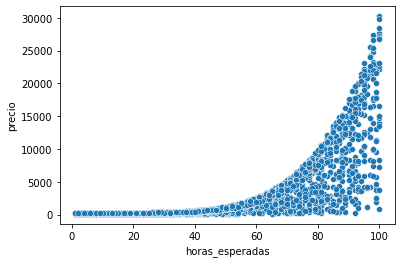

In [ ]:
#Creamos garfico de DISPERSION
sns.scatterplot(x= "horas_esperadas", y="precio", data=datos)

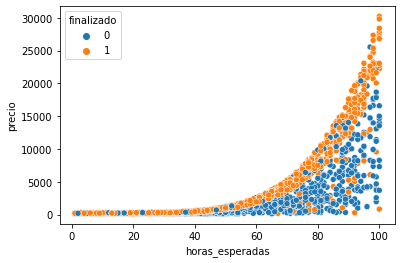

In [ ]:
#Ahora agregamos otro PARAMETRO para comparar por color
sns.scatterplot(x="horas_esperadas", y="precio", hue="finalizado", data=datos)
#Segun el cuadro a medida que se colocan mas horas de trabajo y el precio es mas
#alto, el trabajo SI se finaliza y si el trabajo no se paga tanto el trabajo NO
#se paga tanto el trabajo NO se finaliza
#Si la persona paga el proyecto se concluye

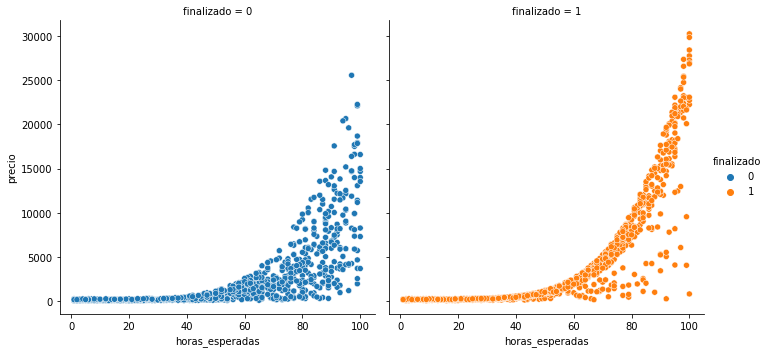

In [ ]:
#Otra forma de observar esto de arriba es a traves de un PLOT RELATIVO
#que nos muestra 2 graficas, agregando la COLUMNA que queremos
sns.relplot(x="horas_esperadas", y="precio", hue="finalizado", data=datos, col="finalizado")
#Nos muestra los que fueron FINALIZADOS(1) y los que no fueron FINALIZADOS(0), y
#podemos ver que hubo casos que las personas pagaron y NO se finalizo el trabajo,
#tambien podemos ver que hubo gente que NO cobro bien pero igual finalizo y por
#eso aparecen puntos OUTLIERS

In [ ]:
#Ahora vamos a realizar un proyecto de MACHINE LEARNING, para saber si el
#proyecto fue FINALIZADO(1) o NO FINALIZADO(0), a traves de los datos analizados
#Importamos NUMPY para que la SEED rode las veces necesarias y no estar haciendoló
#cada vez que ejecutemos el codigo
import numpy as np
#Agregamos nuestra X y Y
x= datos[["horas_esperadas", "precio"]]
y= datos.finalizado
#Agregamos nuestro SEED con numpy
SEED=42
np.random.seed(SEED)
#Reutilizamos el codigo de mas arriba para entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
print(f"Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)} elementos.")#Para saber con cuantos datos ENTRENAMOS y PROBAMOS

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, model.predict(x_test))
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")
#EJECUTAMOS-->

Entrenamos con 1617 elementos y probamos con 540 elementos.
La tasa de acierto fue de : 47.41%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Anteriormente nos dice que nuestra TASA DE ACIERTO fue del 57.59%, eso es
#BUENO o MALO???, no lo sabemos , necesitamos establecer una BASELINE!, que es
#como una linea base , un punto de partida
#Comenzamos creando un VECTOR, que nos va a decir que todo fue FINALIZADO y le
#colocamos los 540 elementos de Prueba
base_previsiones = np.ones(540)

In [ ]:
#Ahora medimos nuestra TASA DE ACIERTO
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f"Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)} elementos.")
#EJECUTAMOS-->Hay una mejoraen tema de porcentaje

Entrenamos con 1617 elementos y probamos con 540 elementos.


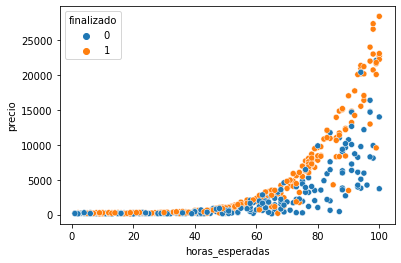

In [ ]:
#Entonces, como es que nuestro ALGORITMO esta trabajando para saber sin un proyecto
#fue FINALIZADO o NO fue FINALIZADO, para esto hay que ver donde caen los PUNTOS
# de las muestras para saber donde mi ALGORITMO toma que el proyecto FINALIZO o NO
#FINALIZO
#Para esto vamos a graficar todos los PUNTOS POSIBLES para nuestro MODELO
#Creamos un SCATTERPLOT
sns.scatterplot(x="horas_esperadas", y="precio", hue=y_test, data=x_test)
#Ejecutamos--> Cuantos mas horas de trabajoy mas se paga los mas probable es que el
#proyecto sea FINALIZADO

In [ ]:
#Pero como va a clasificar el ALGORITMO los PUNTOS???
#Establecemos un Valor X MINIMO y hacemos X_pruebas de las horas_esperadas y un
# Valor X MAXIMO y hacemos X_pruebas de las horas_esperadas y un Valos X MINIMO
#de precio y un Valor X MAXIMO del precio y de esta manera obtenemos valores
#MINIMOS y MAXIMOS, de precios y horas_esperadas, luego hacemos lo mismo con Y -->
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [ ]:
#Luego creamos una Variable llamada PIXELS, tomamos los pixeles de toda el AREA(100)
#y vamos a tomar los EJES y creamos un NP(NUMPY).ARANGE tomamos el X MINIMO y el
#X maximo, despues el valor del del X MAXIMO menos el X MINIMO dividido entre las cantidad de
#PIXELES, para generar los PUNTOS en toda la zona y lo mismo con el EJE Y
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
#Ahora creamos las Variable XX y YY y hacemos una MESHGRID() con NP y los EJES y
#creamos nuestros PUNTOS y aplicamos el metodo .RAVEL() que toma un ARRAY bidimensional
# y lo transforma en un VECTOR
xx,yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos
#Nos devuelve un ARRAY con los PUNTOS

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [ ]:
from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
#Ahora creamos una variable llamada Z, tomamos nuestro MODELO y hacemos una
#PREDICCION de nuestros PUNTOS
Z = model.predict(puntos)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

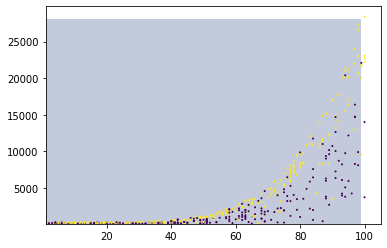

In [ ]:
#Ahora vamos a graficar con MATPLOTLIB el contorno para ver si la linea que me
#separa la CLASE de que fue FINALIZADO o NO FINALIZADO
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3);
plt.scatter(x_test.horas_esperadas, x_test.precio, c= y_test, s= 1);
#c igual al color y s igual tamaño de punto
#EJECUTAMOS--->
#Nos muestra que en la parte inferior del grafico se puede observar una LINEA
#VERDE(curva DESICION BOUNDERE) LIMITE DE DECISION del 57% que es PESIMA!
#en amarillo una clasificacion y morado otra clasificacion

*Support Vector Machines y sistemas No Lineales*

Entrenamos con 1617 elementos y probamos con 540 elementos.
La tasa de acierto fue de : 67.78%


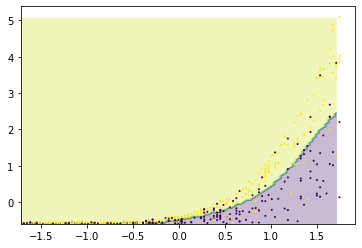

In [ ]:
#Una RECTA, NO es lo quemejor describe mis DATOS, el comportamiento se concentra
#en una CURVA, necesitamos hallar y trabajar con nuestro Datos
#Utilizamos SVC() en lugar de LINEARSVC(), y copiamos nuestro datos y modelo
#ademas de todos los pasos que hicimos anteriormente para GRAFICAR!
from sklearn.svm import SVC
#Importamos para ESTANDARIZAR-->
from sklearn.preprocessing import StandardScaler

x= datos[["horas_esperadas", "precio"]]
y= datos.finalizado

SEED=42
np.random.seed(SEED)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
#Agregamos para ESTANDARIZAR-->
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
print(f"Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)} elementos.")

#INSTANCIAMOS-->
scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)


model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

#Creamos Varible nuevas, porque horas_esperadas y precio usa pandas y estandar
#usa numpy
data_x = x_test[:,0]#tomamos toda la fila de la columna 0 que es de horas_esperadas
data_y = x_test[:,1]#precio

#Sustituimos Variables en X y Y
#Puntos max y min
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

#Pixels
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

#Puntos
xx,yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]


#Nuestro Z y SHAPE
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

#Sustituimos Variables aqui tambien
#Grafico
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s= 1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100, 2)}%")
#EJECUTAMOS -->
#Al GRAFICAR vemos que NO clasifica bienpor mas que sea un clasificador de
#CURVAS, esto se debe a que la escala de HORAS TRABAJADAS no esta en ESCALA con
#las de PRECIO, y estos ALGORITMOS NO trabajan bien en Datos que NO esten en la
#misma ESCALA, por esto tenemos que ESTANDARIZAR--->
#Usamos STANDARD SKLEARN, que es parte del MODULO PREPROCESSING que forma la
#MEDIA y la divide por el desvio PADRON, es decir trae todos los datos a una
#misma ESCALA.


*Dummy classifiers y arboles de decision.*

In [ ]:
#Vamos a usar un nuevo Link
uri = "https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv"
#Instanciamos la lectura de nuestro CSV
datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
#Vamos a cambiar el Nombres, creamos Diccionario
mapa = {"mileage_per_year": "millas_po_ano",
        "model_year": "ano_del_modelo",
        "price": "precio",
        "sold": "vendido"
}

datos = datos.rename(columns=mapa)
datos.sample(3)

,Unnamed: 0,millas_po_ano,ano_del_modelo,precio,vendido
6252,6252,10309,1999,96176.92,yes
4684,4684,13140,2012,72496.09,yes
1731,1731,15674,1998,80948.12,no


In [ ]:
#Luego cambiamos el NO vendido por un 0 y el SI vendido por 1

cambio = {"no":0, "yes":1}
datos.vendido = datos.vendido.map(cambio)
datos.sample(3)


,Unnamed: 0,millas_po_ano,ano_del_modelo,precio,vendido
6366,6366,10515,2008,82713.13,0
9628,9628,15864,2001,51707.37,1
5916,5916,10631,2001,73809.98,0


In [ ]:
#Nos NO sirve de mucho el AÑO DEL MODELO, sino que nos sirve saber cual viejo
#o no nuevo es el auto, entonces vamos a Importar bibilioteca DATETIME y tomamos
#el año actual, el DATETIME de hoy (today) y creamos nuevo atributo
from datetime import datetime

ano_actual = datetime.today().year
datos["edad_del_modelo"] = ano_actual - datos.ano_del_modelo
datos.sample(3)

,Unnamed: 0,millas_po_ano,ano_del_modelo,precio,vendido,edad_del_modelo
8740,8740,17282,2001,66111.33,0,21
7755,7755,13853,2000,23422.05,1,22
1092,1092,17262,2000,86909.86,0,22


In [ ]:
#Cambiamos MILLAS por KILOMETROS (1 milla = 1.60934km)
datos["km_por_ano"] = datos.millas_po_ano * 1.60934
datos.sample(3)

,Unnamed: 0,millas_po_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
4449,4449,9105,1998,36803.64,1,24,14653.04070
1468,1468,10628,1998,39691.88,1,24,17104.06552
6973,6973,8521,2004,90252.06,0,18,13713.18614


In [ ]:
#Luego hacemos un DROP a la columnas que NO utilizaremos
datos = datos.drop(columns=["Unnamed: 0","millas_po_ano","ano_del_modelo"], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
8718,62635.88,0,24,29381.72038
1765,65778.80,1,12,39652.52826
3011,56814.68,1,22,22047.95800


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = datos[["edad_del_modelo","km_por_ano","precio"]]
y = datos.vendido

SEED=42
np.random.seed(SEED)


raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
print(f"Entrenamos con {len(raw_x_train)} elementos y probamos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100,2)}%")


Entrenamos con 7500 elementos y probamos con 2500 elementos.
La tasa de acierto fue de : 76.04%


In [ ]:
#Como podemos establecer que este modelo de arriba es bueno??, podemos establecer
#nuestra BASELINE, vamos a utilizar otra herramienta de SKLEARN que se llama
# DUMMY CLASSIFIER, que es un clasificador que nos ayuda a tener una BASELINE pero
# NO es exacto
#Importamos-->
from sklearn.dummy import DummyClassifier
#Instanciamos-->
dummy = DummyClassifier(strategy = "stratified")#por defecto viene como parametro
# con PRIER, pero podemos cambiar de estrategia a STRATIFIED)
dummy.fit(x_train, y_train)
#Calculamos la EXACTITUD
exactitud = dummy.score(x_test, y_test)*100
print(f"La EXACTITUD del clacificador DUMMY STRATIFIED fue: {round(exactitud,2)}%")

La EXACTITUD del clacificador DUMMY STRATIFIED fue: 51.56%


In [ ]:
#Podemos cambiar la Estrategia por MOST_FREQUENT, y la cambiamos por en el codigo
#Podemos concluir que dependiendo del tipo de Estrategia, nosotros al momento de
#En este caso MOST_FREQUENT es la mejor opcion de BASELINE
from sklearn.dummy import DummyClassifier
#Instanciamos-->
dummy = DummyClassifier(strategy = "most_frequent")#por defecto viene como parametro
# con PRIER, pero podemos cambiar de estrategia a MOST_FREQUENT)
dummy.fit(x_train, y_train)
#Calculamos la EXACTITUD
exactitud = dummy.score(x_test, y_test)*100
print(f"La EXACTITUD del clacificador DUMMY MOST_FREQUENT fue: {round(exactitud,2)}%")


La EXACTITUD del clacificador DUMMY MOST_FREQUENT fue: 58.0%


In [ ]:
#Existe un clasificador que puede hallar la forma de ver como SVC trabaja por dentro
#Cual es la decision que nuestro modelo esta adoptando, y para esto tenemos un
#ALGORITMO llamadado ARBOL DE DECISION!
#Copiamos todo el comando que hemos venido trabajando y en vez de importar SVC
#Vamos a IMPORTAR DECISION TREE-->

#USANDO STANDARD SKLEARN
from sklearn.tree import DecisionTreeClassifier

x = datos[["edad_del_modelo","km_por_ano","precio"]]
y = datos.vendido

SEED=42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
print(f"Entrenamos con {len(raw_x_train)} elementos y probamos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)#Instanciamos el Modelo por Arbol de Decision
#y agregamos PARAMETRO MAX_DEPTH, para visualizar mejor!
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100,2)}%")

#Ejecutamos --> y nos da una tasa de acierto del 71.76 %, menos que en SVC, ya que
#SVC es mas completo, pero de todas formas lo que necesitamos nosotros es entender
#las REGLAS DE DECISION y no tanto la tasa de acierto

Entrenamos con 7500 elementos y probamos con 2500 elementos.
La tasa de acierto fue de : 78.04%


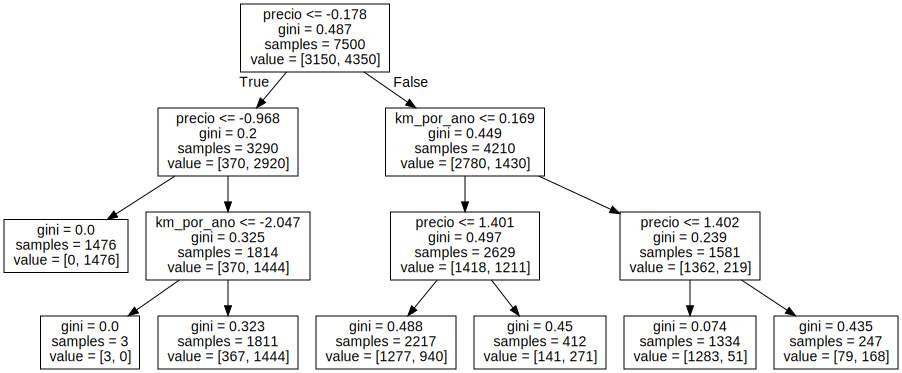

In [ ]:
#Como podemos nosotros observar de que manera nuestro ARBOL DE DECISION va formandose
# y de que forma se van tomando las Decisiones
#Importamos paquete-->
from sklearn.tree import export_graphviz
#Importamos lo que nos permite realizar grafos de ARBOL DECISION-->
import graphviz
#Creamos VARIABLE=INSTANCIAMOS(PARAMETRO,modelo, columnas)
features = x.columns
dot_data = export_graphviz(model, feature_names=features)
#Creamos otra VARIABLE, pasamos el Recurso y nuestra Variable-->
grafico = graphviz.Source(dot_data)
#Para ver el GRAFICO que muestra ARBOL DE DECISION-->
grafico
#Ejecutamos--> y es muy dificil de Visualizar, ya se sigue un FLUJO muy extenso,
#NO es buena idea realizarlo asi, por lo tanto adaptamos un PARAMETRO MAX_DEPTH!!

In [ ]:
# SIN ESTANDARIZAR (borramos raw y las escalas)
#Nos devuelve una tasa de acierto del 78.40%, mejor que SVC
from sklearn.tree import DecisionTreeClassifier

x = datos[["edad_del_modelo","km_por_ano","precio"]]
y = datos.vendido

SEED=42
np.random.seed(SEED)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=SEED,stratify=y)
print(f"Entrenamos con {len(x_train)} elementos y probamos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)#Instanciamos el Modelo por Arbol de Decision
#y agregamos PARAMETRO MAX_DEPTH, para visualizar mejor!
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f"La tasa de acierto fue de : {round(tasa_de_acierto*100,2)}%")

Entrenamos con 7500 elementos y probamos con 2500 elementos.
La tasa de acierto fue de : 78.04%


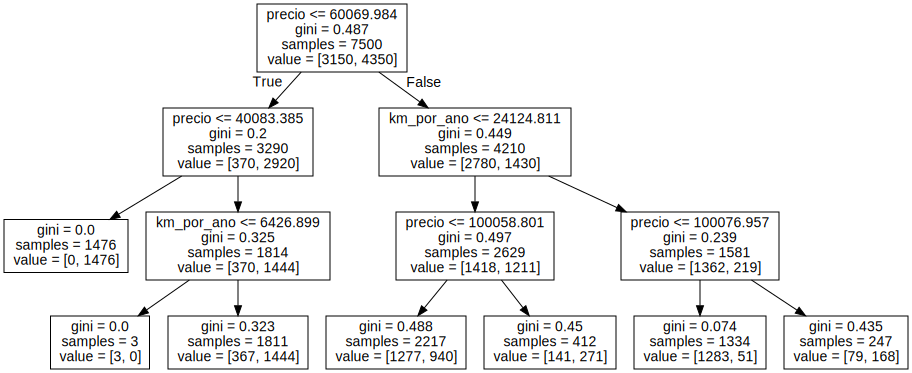

In [ ]:
#Si vuelvo a realizar el GRAFICO, sin estandarizar, me mueetra mejor hasta el
#PRECIO!
from sklearn.tree import export_graphviz
#Importamos lo que nos permite realizar grafos de ARBOL DECISION-->
import graphviz
#Creamos VARIABLE=INSTANCIAMOS(PARAMETRO,modelo, columnas)
features = x.columns
dot_data = export_graphviz(model, feature_names=features)
#Creamos otra VARIABLE, pasamos el Recurso y nuestra Variable-->
grafico = graphviz.Source(dot_data)
#Para ver el GRAFICO que muestra ARBOL DE DECISION-->
grafico

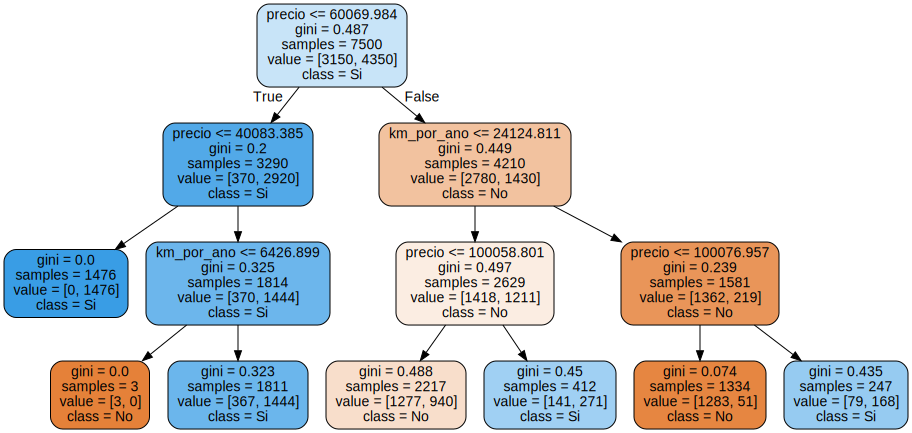

In [ ]:
#Podemos mejorar aun mas colocando un relleno y coloreamos-->
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=["No","Si"])
grafico = graphviz.Source(dot_data)
grafico
#Ejecutamos--> Y esto se puede leer-->
#EL PRECIO <= a 60069.984, que se divide en 2, VERDADERO que SI se va a VENDER y
#FALSO que NO se va  VENDER(CLASS=NO)
#SAMPLES, nos muestra el numero de MUESTRAS
#GINI, medida optimizable
#Mientras mas Oscuro el COLOR AZUL, hay mas posibilidades de VENDER y mientras mas
#Oscuro el COLOR NARANJA, menos posibilidades de VENDER